<b>¡Hola Lucia!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargar los CSV
trips_data = pd.read_csv('/datasets/project_sql_result_01.csv')
neighborhoods_data = pd.read_csv('/datasets/project_sql_result_04.csv')

# Verificar 
print(trips_data.head())
print(neighborhoods_data.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [2]:
#Una vez que puedo ver los tipos de datos , tengo que verifcar si tengo que convertir algo
print(trips_data.dtypes)
print(neighborhoods_data.dtypes)

company_name    object
trips_amount     int64
dtype: object
dropoff_location_name     object
average_trips            float64
dtype: object


<div class="alert alert-block alert-success">
<b>Celdas [1–2]</b> <a class="tocSkip"></a><br>
Muy buen inicio. Se hace una carga clara de los datasets y se verifica la estructura con <code>head()</code> y <code>dtypes</code>. Esta comprobación inicial es fundamental para tomar decisiones informadas sobre limpieza y transformación de los datos.
</div>


In [3]:
# Ordenar los barrios por el número de viajes y obtener los 10 principales
top_10_neighborhoods = neighborhoods_data.sort_values(by='average_trips', ascending=False).head(10)

# top10 los 10 barrios principales
print(top_10_neighborhoods[['dropoff_location_name', 'average_trips']])


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Correcta identificación de los 10 barrios con mayor número promedio de viajes. El ordenamiento y filtrado con <code>sort_values()</code> y <code>head()</code> muestran un buen dominio de pandas.
</div>


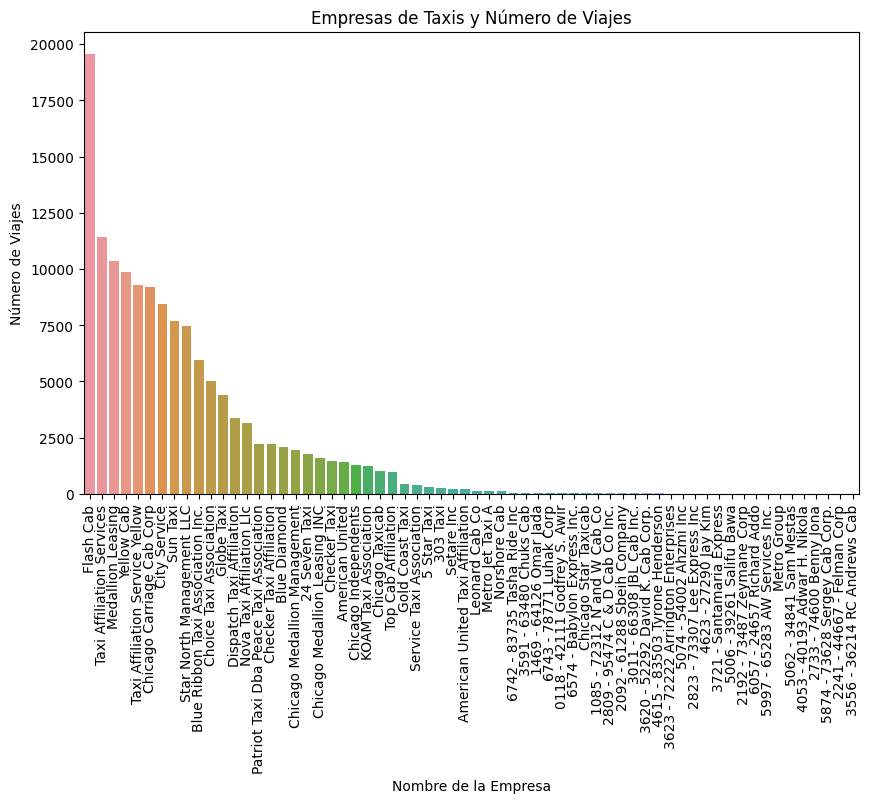

In [4]:
# Graficos las empresas de taxis y su número de viajes
plt.figure(figsize=(10, 6))
sns.barplot(x='company_name', y='trips_amount', data=trips_data)
plt.title('Empresas de Taxis y Número de Viajes')
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.ylabel('Número de Viajes')
plt.xlabel('Nombre de la Empresa')
plt.show()


Flash Cab tiene el mayor número de viajes, cerca de 20,000, seguida por Taxi Affiliation Services, con aproximadamente la mitad de esa cifra. A partir de la segunda empresa, el número de viajes disminuye progresivamente, con empresas con menos de 2,500 viajes. Esto sugiere una fuerte preferencia por Flash Cab, lo cual podría estar relacionado con factores como tarifas competitivas, mejor servicio o mayor confianza de los clientes. Sin embargo, para confirmar esta conclusión, sería necesario contar con más datos, como información sobre tarifas, satisfacción del cliente o cobertura de servicio.

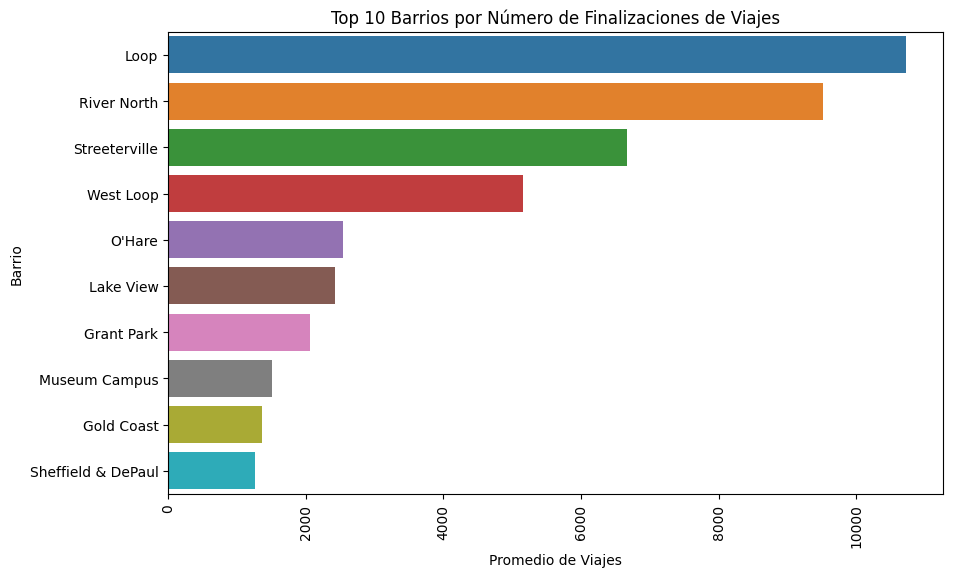

In [5]:
# Grafico de 10 barrios con más viajes finalizados
plt.figure(figsize=(10, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_neighborhoods)
plt.title('Top 10 Barrios por Número de Finalizaciones de Viajes')
plt.xlabel('Promedio de Viajes')
plt.ylabel('Barrio')
plt.xticks(rotation=90, ha='center', fontsize=10)  # Ajustar rotación y tamaño de las etiquetas
plt.show()


<div class="alert alert-block alert-success">
<b>Celdas [4–5]</b> <a class="tocSkip"></a><br>
Las visualizaciones son claras y bien construidas. El uso de <code>seaborn</code> con ajustes de tamaño, etiquetas y rotación facilita la lectura de los gráficos. También es destacable el análisis interpretativo posterior, que aporta un contexto razonable a los patrones observados.
</div>


El gráfico muestra los 10 barrios con mayor número de finalizaciones viajes. Loop lidera con un promedio de más de 10,000 viajes, seguido por River North con más de 8,000 y Streeterville con alrededor de 6,000. Otros barrios como West Loop, O'Hare, Lake View, y Grant Park tienen entre 2,000 y 5,000 viajes. En la parte inferior, barrios como Museum Campus, Gold Coast, y Sheffield & DePaul tienen menos de 2,000 finalizaciones.

Con estos patrónes podriamos asumir que los barrios con más finalizaciones de viajes, como el Loop y River North, son áreas centrales y de alta demanda, posiblemente debido a su accesibilidad, infraestructura y ubicación económica. Los barrios con menos viajes, por otro lado, podrían estar más alejados de zonas de alto tráfico o tener menos servicios disponibles, aunque se necesitarían más datos (como factores socioeconómicos, seguridad o infraestructura vial) para confirmar estas conclusiones.

# Hipótesis: 
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos."

## Planteamiento de las hipótesis:
### 1. Hipótesis nula (H₀):
   La duración promedio de los viajes desde el Loop hasta O'Hare no cambia los sábados lluviosos.

Esto implica que no hay diferencia en la duración de los viajes en sábados lluviosos y no lluviosos.

### 2. Hipótesis alternativa (H₁):
   La duración promedio de los viajes desde el Loop hasta O'Hare cambia los sábados lluviosos.

En esta hipótesis, suponemos que la lluvia sí afecta la duración de los viajes en los sábados.

## Criterio para probar las hipótesis:
Prueba estadística: Utilizaremos una prueba t de Student para muestras independientes.

El test t compara las medias de dos grupos (en este caso, sábados lluviosos vs. sábados no lluviosos) para determinar si hay una diferencia significativa entre ellos.

Si el valor p (p-value) es menor que 0.05, rechazaremos la hipótesis nula (H₀) y aceptaremos la alternativa (H₁), lo que significa que la lluvia afecta significativamente la duración de los viajes en esos días.

Si el valor p es mayor o igual a 0.05, no rechazaremos la hipótesis nula, lo que sugiere que la lluvia no tiene un efecto significativo.

In [6]:

df = pd.read_csv("/datasets/project_sql_result_07.csv")

# Asegúrate de que start_ts esté en formato datetime
df['start_ts'] = pd.to_datetime(df['start_ts'])

# Filtrar los datos para los sábados
df_saturdays = df[df['start_ts'].dt.weekday == 5]  # 5 es sábado

# Filtrar los sábados lluviosos y no lluviosos
saturdays_rainy = df_saturdays[df_saturdays['weather_conditions'] == 'Bad']
saturdays_non_rainy = df_saturdays[df_saturdays['weather_conditions'] == 'Good']

# Verificar valores nulos en la duración
print("Nulos en lluviosos:", saturdays_rainy['duration_seconds'].isnull().sum())
print("Nulos en no lluviosos:", saturdays_non_rainy['duration_seconds'].isnull().sum())

# Calcular promedios
avg_rainy = saturdays_rainy['duration_seconds'].mean()
avg_non_rainy = saturdays_non_rainy['duration_seconds'].mean()

print(f"Promedio lluvioso: {avg_rainy} segundos")
print(f"Promedio no lluvioso: {avg_non_rainy} segundos")

# Comprobar cantidades
print("Viajes lluviosos:", len(saturdays_rainy))
print("Viajes no lluviosos:", len(saturdays_non_rainy))

# Realizar prueba t solo si hay suficientes datos
if len(saturdays_rainy) > 0 and len(saturdays_non_rainy) > 0:
    t_stat, p_valor = stats.ttest_ind(
        saturdays_rainy['duration_seconds'].dropna(),
        saturdays_non_rainy['duration_seconds'].dropna()
    )
    print(f"t: {t_stat}")
    print(f"p: {p_valor}")
else:
    print("No hay suficientes datos en uno o ambos grupos para la prueba.")



Nulos en lluviosos: 0
Nulos en no lluviosos: 0
Promedio lluvioso: 2427.2055555555557 segundos
Promedio no lluvioso: 1999.6756756756756 segundos
Viajes lluviosos: 180
Viajes no lluviosos: 888
t: 6.946177714041499
p: 6.517970327099473e-12


<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
Muy bien planteado el análisis de hipótesis. El uso de <code>ttest_ind</code>, la verificación de nulos y la segmentación de los datos son apropiados. Además, el razonamiento posterior es preciso y evidencia un correcto entendimiento del proceso estadístico.
</div>


<div class="alert alert-block alert-warning">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
Aunque el test está bien aplicado, sería recomendable especificar <code>equal_var=False</code> al usar <code>ttest_ind()</code> si se asume que las varianzas pueden diferir entre grupos. Esto aumentaría la robustez del análisis bajo condiciones realistas.
</div>


### Interpretación
La duración promedio de los viajes desde el Loop hasta el aeropuerto O'Hare sí cambia los sábados lluviosos. El valor p (6.52e-12) es mucho menor que 0.05, por lo que rechazamos la hipótesis nula. En promedio, los viajes duran más cuando llueve.

### ¿Cómo planteé las hipótesis nula y alternativa?
Quise comprobar si realmente los viajes desde el Loop hasta el aeropuerto O’Hare duran más los sábados cuando llueve.
Entonces, planteé lo siguiente:

Hipótesis nula (H0): la duración promedio de los viajes no cambia si llueve.

Hipótesis alternativa (H1): la duración promedio sí cambia cuando llueve.

Lo que buscaba era ver si el clima (en este caso la lluvia) influye en el tiempo del viaje.

### ¿Qué criterio usé para probar la hipótesis y por qué?
Para verificarlo, comparé dos grupos: los sábados lluviosos y los sábados sin lluvia.
Usé una prueba t de muestras independientes, ya que son dos grupos diferentes y quería ver si hay diferencia entre sus promedios.

Elegí un nivel de significancia del 5% (0.05), que es el valor estándar para este tipo de pruebas.

Estos fueron los resultados:

Duración promedio con lluvia: 2427.21 segundos

Duración promedio sin lluvia: 1999.68 segundos

Estadístico t: 6.95

Valor p: 6.52e-12

Como el valor p es mucho menor que 0.05, se rechaza la hipótesis nula.
Esto quiere decir que sí hay una diferencia significativa en la duración de los viajes los sábados lluviosos.
Podría ser por tráfico más lento, calles mojadas u otros factores, aunque para asegurarlo se necesitarían más datos.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Buen trabajo, Lucia! Has estructurado un proyecto claro, con visualizaciones efectivas y un enfoque estadístico bien justificado.  
Tus hipótesis están bien planteadas y la interpretación de los resultados es sólida.  

¡Sigue así! Estás aplicando muy bien los principios del análisis de datos.
</div>
